# <p style="text-align: center;">Assignment 12 Solution</p>
### <p style="text-align: center;">Submitted by: Yameen Ali</p>
### <p style="text-align: center;"><a href="https://github.com/YameenAli/Data-Science-Assignments/tree/main/Assignment%2012%20Solution">Go to Github repository</a></p>
---

# Import Dependencies 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read Data 

In [3]:
data = pd.read_csv('students data.csv')
df = pd.DataFrame(data)
df.head()

,id,Name,date_of_birth,gender,entry_academic_period,Math,Reading,Writing
0,111111,John,01/2000,M,Fall 2008,80,75,82
1,111112,Jane,05/2001,F,Fall 2006,65,56,78
2,111113,Sarah,21/2002,M,Fall 2006,92,90,81
3,111114,Frank,13/2002,M,Fall 2006,53,62,60
4,111115,Mike,31/2001,F,Fall 2007,42,54,50


# Gender Disparity in Academic Performance

In [33]:
# Group by gender and calculate mean score
gender_means = data.groupby('gender')[['Math', 'Reading', 'Writing']].mean()
#print(gender_means)  # Display the results

# Perform t-tests for each subject 
math_ttest = stats.ttest_ind(df[df['gender'] == 'M']['Math'], df[df['gender'] == 'F']['Math'])
reading_ttest = stats.ttest_ind(df[df['gender'] == 'M']['Reading'], df[df['gender'] == 'F']['Reading'])
writing_ttest = stats.ttest_ind(df[df['gender'] == 'M']['Writing'], df[df['gender'] == 'F']['Writing'])

print("Gender Performance:")
print(gender_means)  
print("\nt-test results:")
print(f"Math: p-value = {math_ttest.pvalue:.4f}")
print(f"Reading: p-value = {reading_ttest.pvalue:.4f}")
print(f"Writing: p-value = {writing_ttest.pvalue:.4f}")

Gender Performance:
        Math  Reading  Writing
gender                        
F       64.4    67.60    69.40
M       74.5    70.75    73.25

t-test results:
Math: p-value = 0.5548
Reading: p-value = 0.7677
Writing: p-value = 0.6869


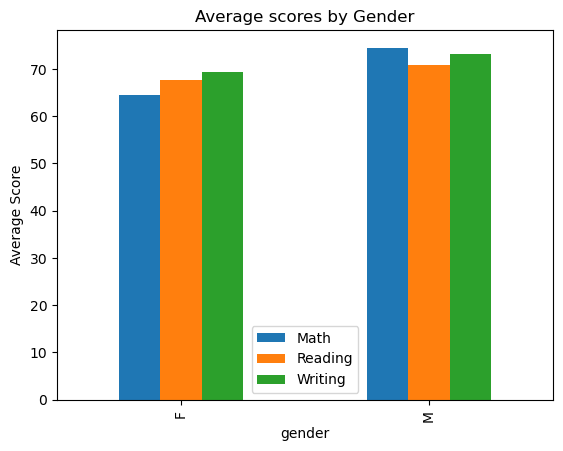

In [23]:
gender_means.plot(kind='bar')
plt.title('Average scores by Gender')
plt.ylabel('Average Score')
plt.show()

# Impact of Birth Year on Performance

Correlations with Birth Year:
Math      NaN
Reading   NaN
Writing   NaN
Name: date_of_birth, dtype: float64


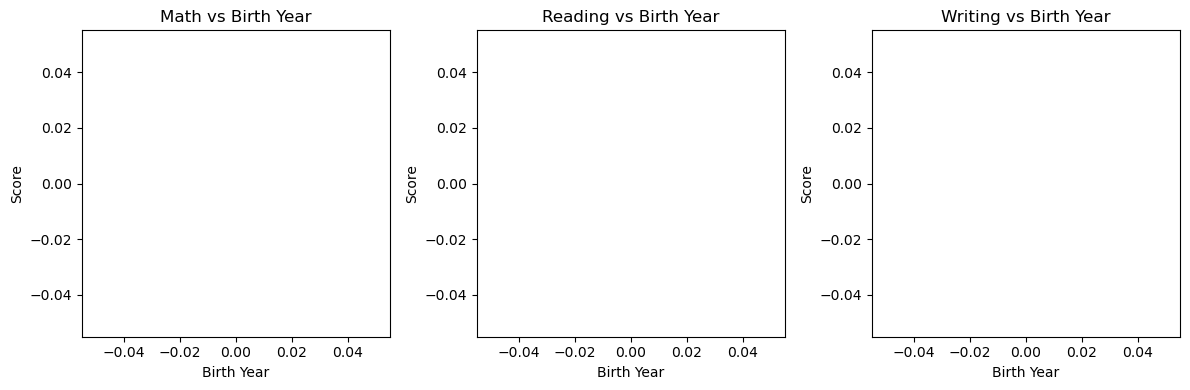

In [20]:
# Calculate correlation between birth year and scores
correlations = df[['date_of_birth', 'Math', 'Reading', 'Writing']].corr()['date_of_birth'][1:]

print("Correlations with Birth Year:")
print(correlations)

# Scatter plot of birth year vs scores
plt.figure(figsize=(12, 4))
for i, subject in enumerate(['Math', 'Reading', 'Writing']):
    plt.subplot(1, 3, i+1)
    plt.scatter(df['date_of_birth'], df[subject])
    plt.title(f'{subject} vs Birth Year')
    plt.xlabel('Birth Year')
    plt.ylabel('Score')
plt.tight_layout()
plt.show()

#  Effect of Entry Academic Period on Performance

Performance by Entry Academic Period:
                            Math    Reading  Writing
entry_academic_period                               
Fall 2006              70.750000  66.000000    72.25
Fall 2007              56.666667  63.666667    63.00
Fall 2008              80.000000  75.000000    82.00
Fall 2010              87.000000  91.000000    80.00


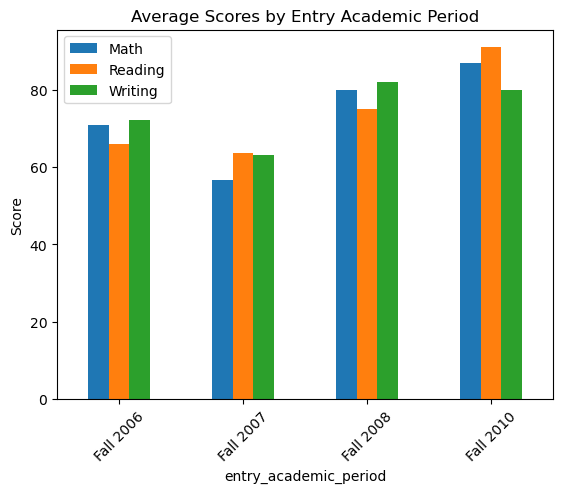

In [24]:
# Group by entry academic period and calculate mean scores
entry_performance = df.groupby('entry_academic_period')[['Math', 'Reading', 'Writing']].mean()

print("Performance by Entry Academic Period:")
print(entry_performance)

# Visualize entry period performance
entry_performance.plot(kind='bar')
plt.title('Average Scores by Entry Academic Period')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

#  Subject-specific Performance Analysis

Overall Mean Scores:
Math       68.888889
Reading    69.000000
Writing    71.111111
dtype: float64


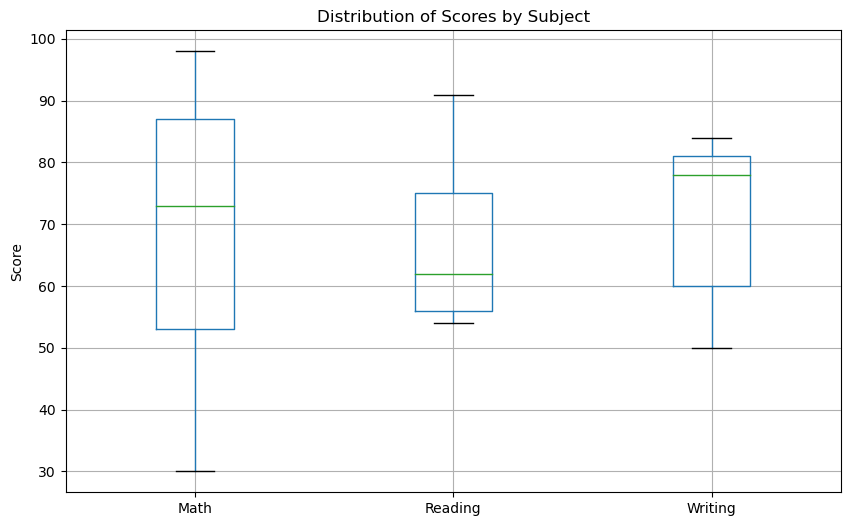

In [29]:
# Calculate overall mean scores for each subject
subject_means = df[['Math', 'Reading', 'Writing']].mean()  # Calculate mean for Math, Reading, Writing columns

print("Overall Mean Scores:")
print(subject_means)  # Print the calculated means

# Boxplot of scores for each subject
plt.figure(figsize=(10, 6))  # Set figure size for boxplot
df[['Math', 'Reading', 'Writing']].boxplot()  # Create boxplot for Math, Reading, Writing columns
plt.title('Distribution of Scores by Subject')  # Set boxplot title
plt.ylabel('Score')  # Label the y-axis
plt.show()  # Display the boxplot

# Longitudinal Analysis of Performance

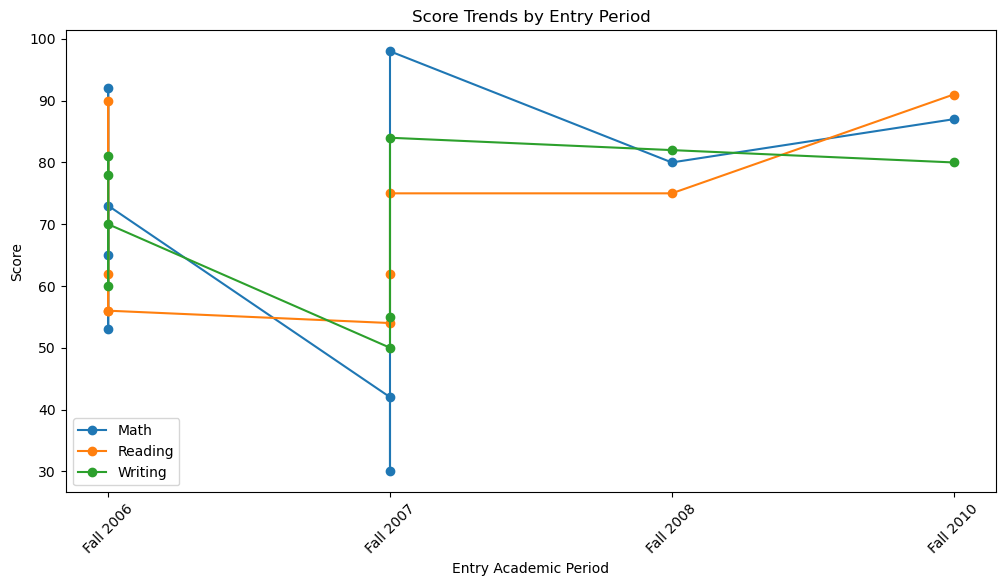

In [28]:
# Sort by entry period (ascending)
df_sorted = df.sort_values('entry_academic_period')

# Line plot: scores vs. entry period (separate lines for subjects)
plt.figure(figsize=(12, 6))
for subject in ['Math', 'Reading', 'Writing']:
    plt.plot(df_sorted['entry_academic_period'], df_sorted[subject], marker='o', label=subject)
plt.title('Score Trends by Entry Period')  # Shorter title
plt.xlabel('Entry Academic Period')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
